In [78]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
from helpers import *
from plots import *
from mf_sgd import *
from baseline_predictions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Load Data

number of items: 10000, number of users: 1000


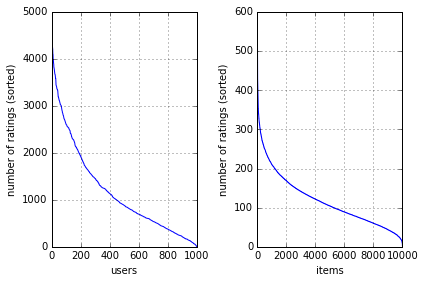

In [79]:
path_dataset = "/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

# 2) Run biased MF

In [96]:
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=0)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059256
Total number of nonzero elements in test data:117696


In [129]:
from biased_mf_sgd import mf_sgd_biased
lamda_user = 0
lambda_item = 0
num_features = 20
gamma = 0.02
num_epochs = 20
rmse_train, rmse_test = mf_sgd_biased(train, test, num_epochs, gamma, num_features, lamda_user, lambda_item)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.01044007].
RMSE on test data: [ 1.03497806].
iter: 1, RMSE on training set: [ 1.0007842].
RMSE on test data: [ 1.03255958].
iter: 2, RMSE on training set: [ 0.99238694].
RMSE on test data: [ 1.03148792].
iter: 3, RMSE on training set: [ 0.98437167].
RMSE on test data: [ 1.03077255].
iter: 4, RMSE on training set: [ 0.97689882].
RMSE on test data: [ 1.03023866].
iter: 5, RMSE on training set: [ 0.97016596].
RMSE on test data: [ 1.02984466].
iter: 6, RMSE on training set: [ 0.96426912].
RMSE on test data: [ 1.02957301].


KeyboardInterrupt: 

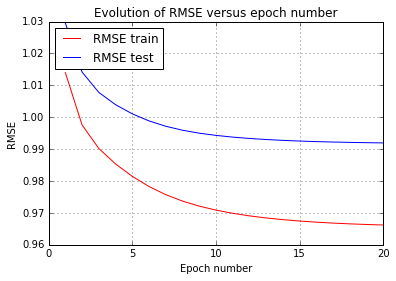

In [126]:
from plots import visualization_rmse_vs_num_epochs
visualization_rmse_vs_num_epochs(num_epochs, rmse_train, rmse_test, "biased_mf")